In [1]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import re
from varname import nameof

In [2]:
prod = pd.read_csv("../data/Food_production.csv")
prod.head()

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,...,371.076923,482.4,0.945482,1.907692,2.897446,7.6,5.846154,18786.2,14450.92308,7162.104461
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,...,3166.760563,2248.4,1.207271,6.267606,0.759631,2.8,3.943662,49576.3,69825.77465,13449.891480


In [3]:
prod.shape

(43, 23)

In [4]:
prod["Food product"]

0     Wheat & Rye (Bread)
1            Maize (Meal)
2           Barley (Beer)
3                 Oatmeal
4                    Rice
5                Potatoes
6                 Cassava
7              Cane Sugar
8              Beet Sugar
9            Other Pulses
10                   Peas
11                   Nuts
12             Groundnuts
13                Soymilk
14                   Tofu
15            Soybean Oil
16               Palm Oil
17          Sunflower Oil
18           Rapeseed Oil
19              Olive Oil
20               Tomatoes
21         Onions & Leeks
22        Root Vegetables
23              Brassicas
24       Other Vegetables
25           Citrus Fruit
26                Bananas
27                 Apples
28       Berries & Grapes
29                   Wine
30            Other Fruit
31                 Coffee
32         Dark Chocolate
33       Beef (beef herd)
34      Beef (dairy herd)
35          Lamb & Mutton
36               Pig Meat
37           Poultry Meat
38          

In [5]:
prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 23 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Food product                                                             43 non-null     object 
 1   Land use change                                                          43 non-null     float64
 2   Animal Feed                                                              43 non-null     float64
 3   Farm                                                                     43 non-null     float64
 4   Processing                                                               43 non-null     float64
 5   Transport                                                                43 non-null     float64
 6   Packging                                                                 43 

In [6]:
columns_with_missings_count = 0
columns_with_missings = []

for column, missing in prod.isnull().sum().iteritems():
    if missing > 0:
        print(f"Column: {column}\nMissing values: {missing}")
        print('-' * 50)
        columns_with_missings_count += 1
        columns_with_missings.append(column)

print(f"Columns with missing values: {columns_with_missings_count} out of {prod.shape[1]}")

Column: Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)
Missing values: 10
--------------------------------------------------
Column: Eutrophying emissions per kilogram (gPO₄eq per kilogram)
Missing values: 5
--------------------------------------------------
Column: Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)
Missing values: 16
--------------------------------------------------
Column: Freshwater withdrawals per 1000kcal (liters per 1000kcal)
Missing values: 13
--------------------------------------------------
Column: Freshwater withdrawals per 100g protein (liters per 100g protein)
Missing values: 17
--------------------------------------------------
Column: Freshwater withdrawals per kilogram (liters per kilogram)
Missing values: 5
--------------------------------------------------
Column: Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)
Missing values: 10
--------------------------------------------------
Column: Greenhouse gas emissi

In [7]:
prod.columns

Index(['Food product', 'Land use change', 'Animal Feed', 'Farm', 'Processing',
       'Transport', 'Packging', 'Retail', 'Total_emissions',
       'Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)',
       'Eutrophying emissions per kilogram (gPO₄eq per kilogram)',
       'Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)',
       'Freshwater withdrawals per 1000kcal (liters per 1000kcal)',
       'Freshwater withdrawals per 100g protein (liters per 100g protein)',
       'Freshwater withdrawals per kilogram (liters per kilogram)',
       'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)',
       'Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)',
       'Land use per 1000kcal (m² per 1000kcal)',
       'Land use per kilogram (m² per kilogram)',
       'Land use per 100g protein (m² per 100g protein)',
       'Scarcity-weighted water use per kilogram (liters per kilogram)',
       'Scarcity-weighted water use per 100g protein 

In [8]:
columns_with_missings

['Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)',
 'Eutrophying emissions per kilogram (gPO₄eq per kilogram)',
 'Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)',
 'Freshwater withdrawals per 1000kcal (liters per 1000kcal)',
 'Freshwater withdrawals per 100g protein (liters per 100g protein)',
 'Freshwater withdrawals per kilogram (liters per kilogram)',
 'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)',
 'Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)',
 'Land use per 1000kcal (m² per 1000kcal)',
 'Land use per kilogram (m² per kilogram)',
 'Land use per 100g protein (m² per 100g protein)',
 'Scarcity-weighted water use per kilogram (liters per kilogram)',
 'Scarcity-weighted water use per 100g protein (liters per 100g protein)',
 'Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)']

In [9]:
co2_per_kg = ["Land use change", "Animal Feed", "Farm", "Processing", "Transport", "Packging", "Retail", "Total_emissions"]

per_1000kcal = ["Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)", "Freshwater withdrawals per 1000kcal (liters per 1000kcal)", "Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)", "Land use per 1000kcal (m² per 1000kcal)", "Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)"]

per_kg = ["Eutrophying emissions per kilogram (gPO₄eq per kilogram)", "Eutrophying emissions per kilogram (gPO₄eq per kilogram)", "Eutrophying emissions per kilogram (gPO₄eq per kilogram)", "Scarcity-weighted water use per kilogram (liters per kilogram)"]

per_100g = ["Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)", "Freshwater withdrawals per 100g protein (liters per 100g protein)", "Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)", "Land use per 100g protein (m² per 100g protein)", "Scarcity-weighted water use per 100g protein (liters per 100g protein)"]

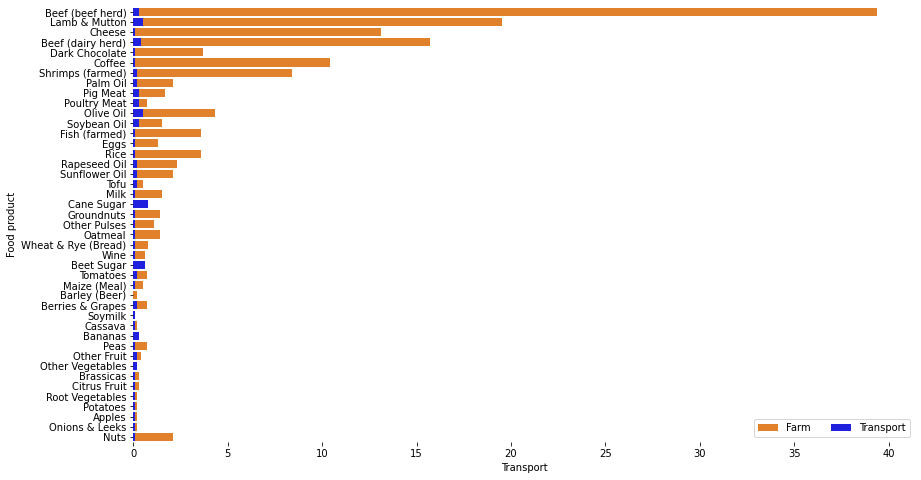

In [10]:
column_for_check = "Farm"

prod2 = prod.set_index("Food product")
prod2 = prod2.sort_values(by = "Total_emissions", ascending = False)

fig, ax = plt.subplots(figsize = (14, 8))
sns.barplot(x = column_for_check, y = prod2.index, data = prod2, label = "Farm", color = (1.0, 0.4980392156862745, 0.054901960784313725))
sns.barplot(x = "Transport", y = prod2.index, data = prod2, label = "Transport", color = "b")

sns.despine(left = True, bottom = True)
ax.legend(ncol = 2, loc = "lower right", frameon = True)
plt.show()

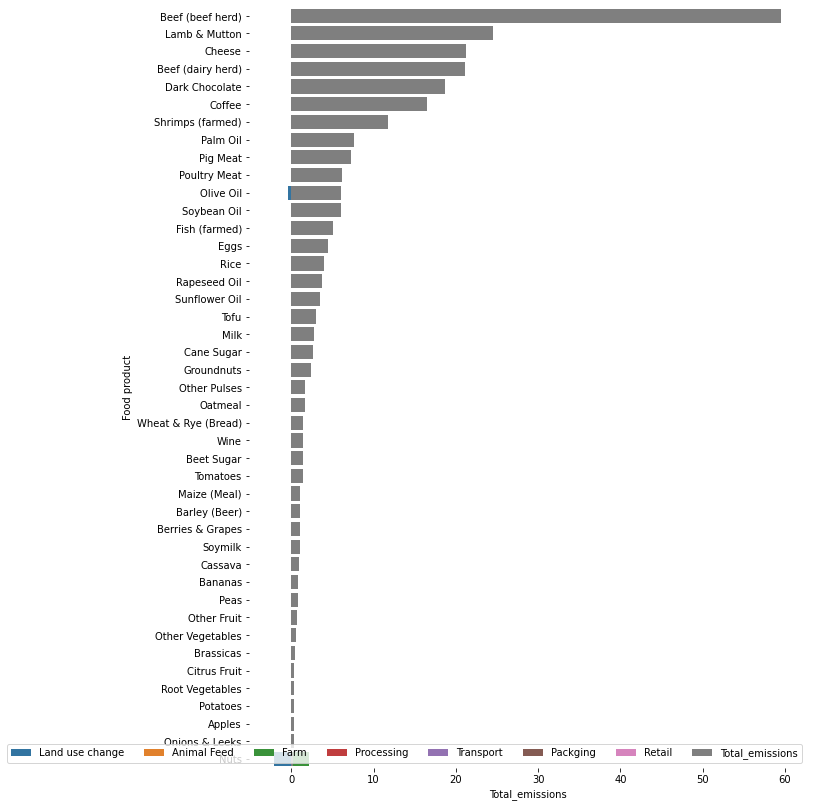

In [11]:
fig, ax = plt.subplots(figsize = (10, 14))
colors = list(sns.color_palette())

for index, column in enumerate(co2_per_kg):
    sns.barplot(x = column, y = prod2.index, data = prod2, label = column, color = colors[index])

sns.despine(left = True, bottom = True)
ax.legend(ncol = len(co2_per_kg), loc = "lower right", frameon = True)
plt.show()

In [12]:
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

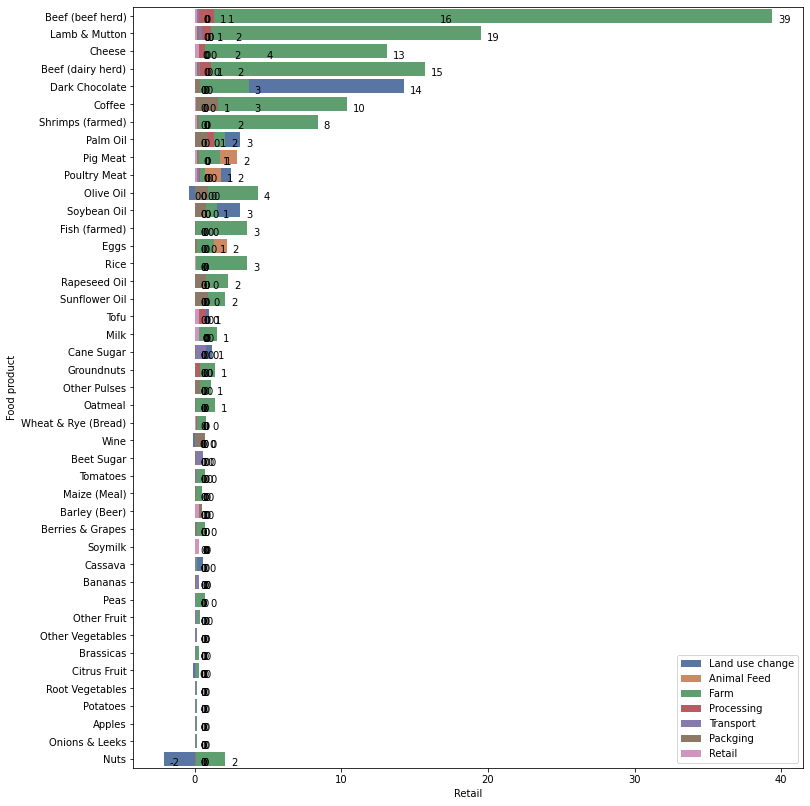

In [13]:
fig, ax = plt.subplots(figsize = (12, 14))

colors = list(sns.color_palette("deep"))

sns.barplot(x = co2_per_kg[0], y = prod2.index, data = prod2, label = co2_per_kg[0], color = colors[0])
sns.barplot(x = co2_per_kg[1], y = prod2.index, data = prod2, label = co2_per_kg[1], color = colors[1])
sns.barplot(x = co2_per_kg[2], y = prod2.index, data = prod2, label = co2_per_kg[2], color = colors[2])
sns.barplot(x = co2_per_kg[3], y = prod2.index, data = prod2, label = co2_per_kg[3], color = colors[3])
sns.barplot(x = co2_per_kg[4], y = prod2.index, data = prod2, label = co2_per_kg[4], color = colors[4])
sns.barplot(x = co2_per_kg[5], y = prod2.index, data = prod2, label = co2_per_kg[5], color = colors[5])
sns.barplot(x = co2_per_kg[6], y = prod2.index, data = prod2, label = co2_per_kg[6], color = colors[6])

#sns.despine(left = True, bottom = True)
ax.legend(ncol = 1, loc = "lower right", frameon = True)
show_values_on_bars(ax, "h")

plt.show()

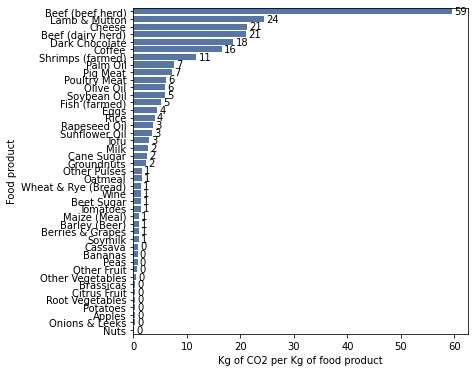

In [14]:
fig, ax = plt.subplots(figsize = (6, 6))

colors = list(sns.color_palette("deep"))

sns.barplot(x = "Total_emissions", y = prod2.index, data = prod2, label = co2_per_kg[0], color = colors[0])

show_values_on_bars(ax, "h")

#sns.despine(left = True, bottom = True)
plt.xlabel("Kg of CO2 per Kg of food product")

plt.show()

In [15]:
def graph():
    fig, ax = plt.subplots(figsize = (6, 14))

    colors = list(sns.color_palette("deep"))

    sns.barplot(x = "Total_emissions", y = prod2.index, data = prod2, label = co2_per_kg[0], color = colors[0])

    #show_values_on_bars(ax, "h")

    #sns.despine(left = True, bottom = True)
    #plt.xlabel("Kg of CO2 per Kg of food product")

    return fig

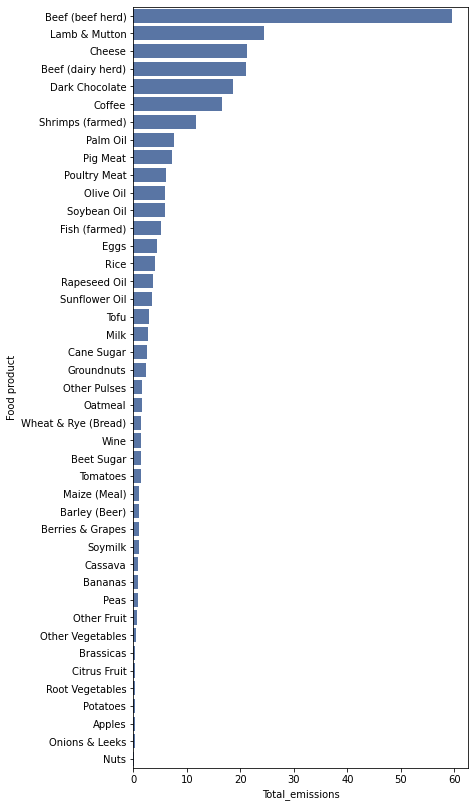

In [16]:
fig = graph()

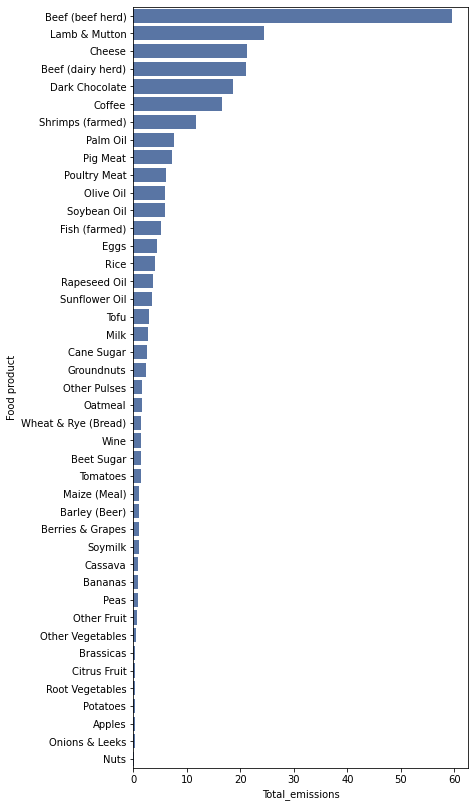

In [17]:
fig

In [19]:
prod["Total_emissions"].max()

59.6